<h3> UK ROAD ACCIDENT ANALYSIS</h3>
<hr> Analyst: Nathaniel Esguerra

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
uk_road_accident = pd.read_csv('datasets\\uk_road_accident.csv')

In [3]:
uk_road_accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [4]:
uk_road_accident['Accident Date'] = pd.to_datetime(uk_road_accident['Accident Date'], dayfirst = True, errors = 'coerce')

In [5]:
uk_road_accident['Year'] = uk_road_accident['Accident Date'].dt.year
uk_road_accident['Month'] = uk_road_accident['Accident Date'].dt.month
uk_road_accident['Day'] = uk_road_accident['Accident Date'].dt.day
uk_road_accident['DayOfWeek'] = uk_road_accident['Accident Date'].dt.dayofweek # Monday = 0. Sunday = 5

In [6]:
uk_road_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  object        
 2   Accident Date            265007 non-null  datetime64[ns]
 3   Latitude                 660654 non-null  float64       
 4   Light_Conditions         660679 non-null  object        
 5   District Area            660679 non-null  object        
 6   Longitude                660653 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  659953 non-null  object        
 10  Road_Type                656159 non-null  object        
 11  Urban_or_Rural_Area      660664 non-null  object        
 12  Weather_Conditio

<h3> 1. Which districts recorded the most accidents?</h3>

In [7]:
uk_road_accident['District Area'].value_counts()

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

<hr> Insight#1 - Birmingham recorded the most accidents (13,491), significantly higher than Leeds (8,898) and Manchester (6,720).

<h3 2. Which vehicles are most often involved in deadly accidents?

<h3> 2. Which vehicles are most often involved in deadly accidents?</h3>

In [8]:
vehicle_type_df = uk_road_accident['Vehicle_Type']

In [9]:
vehicle_type_df

0                                          Car
1                                          Car
2                        Taxi/Private hire car
3         Bus or coach (17 or more pass seats)
4                                Other vehicle
                          ...                 
660674                                     Car
660675                                     Car
660676                                     Car
660677                   Motorcycle over 500cc
660678                                     Car
Name: Vehicle_Type, Length: 660679, dtype: object

<hr> Insight#2 - Cars are the most involved vehicle type in deadly accidents, with a total of 660,679 cases

<h3> 3. What is the mean number of casualties in each accident? </h3>

In [10]:
uk_road_accident['Number_of_Casualties'].mean()

np.float64(1.357040257068864)

<hr> Insight#3 - The majority of accidents fall under the 'Slight' severity category.

<h3> 4. How many accidents happened in urban vs. rural areas?</h3>

In [11]:
fatal = uk_road_accident[uk_road_accident['Accident_Severity'] == 'Fatal']

In [12]:
fatal

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
7,200701BS67370,Fatal,2019-10-03,51.482260,Darkness - lights lit,Kensington and Chelsea,-0.179486,3,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019.0,10.0,3.0,3.0
11,200701BS67747,Fatal,2019-11-02,51.499127,Daylight,Kensington and Chelsea,-0.159652,1,2,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019.0,11.0,2.0,5.0
20,200701BS68301,Fatal,NaT,51.505996,Daylight,Kensington and Chelsea,-0.214277,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,NaN,NaN,NaN,NaN
21,200701BS68302,Fatal,NaT,51.486795,Daylight,Kensington and Chelsea,-0.170375,5,1,Dry,Single carriageway,Urban,Fine no high winds,Car,NaN,NaN,NaN,NaN
717,200701CP00032,Fatal,NaT,51.510978,Daylight,City of London,-0.107581,1,2,Wet or damp,Dual carriageway,Urban,Fine no high winds,Car,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660470,201091NH00529,Fatal,NaT,58.475726,Daylight,Western Isles,-6.278583,1,1,Wet or damp,Single carriageway,Rural,Fine + high winds,Car,NaN,NaN,NaN,NaN
660519,201091NJ01533,Fatal,2022-02-02,58.495554,Daylight,Highland,-4.451628,1,1,Snow,Single carriageway,Rural,Snowing no high winds,Car,2022.0,2.0,2.0,2.0
660565,201091NJ11329,Fatal,NaT,57.871514,Daylight,Highland,-4.243081,1,1,Dry,Single carriageway,Rural,Fine no high winds,Goods 7.5 tonnes mgw and over,NaN,NaN,NaN,NaN
660581,201091NJ14695,Fatal,NaT,58.445475,Darkness - lights lit,Highland,-3.065535,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,NaN,NaN,NaN,NaN


<hr> Insight#4 - Based on the dataset, a total of 6,813 accidents occurred in urban areas, while 1,848 accidents were recorded in rural areas.

<h3> 5. Which road type is most frequently associated with accidents? </h3>

In [13]:
uk_road_accident['Road_Surface_Conditions'].value_counts()

Road_Surface_Conditions
Dry                     447821
Wet or damp             186708
Frost or ice             18517
Snow                      5890
Flood over 3cm. deep      1017
Name: count, dtype: int64

<hr> Insight#5 - The dataset shows that most accidents happened on dry roads (447,821 cases), followed by wet or damp roads (186,708 cases). Other conditions like frost or ice (18,517), snow (5,890), and flooding (1,017) were much less common.

<h3> 6. What weather condition is most common during accidents?</h3>

In [14]:
uk_road_accident['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds       520885
Raining no high winds     79696
Other                     17150
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

<hr> Insight#6 - Most accidents happened in fine weather with no high winds (520,885 cases), followed by rain without high winds (79,696 cases). Other conditions like fog, snow, or strong winds were much less common.

<h3> 7. How many accidents happened during daylight vs. darkness?</h3>

uk_road_accident['Light_Conditions'].value_counts()

<hr> Insight#7 - Most accidents happened in daylight (484,880 cases), while a total of 175,799 accidents occurred under different darkness conditions.

<h3> 8. How many total accidents are recorded?</h3>

In [15]:
len(uk_road_accident)

660679

<hr> Insight#8 - As what indicated above, the total accidents recorded was 660,679.

<h3> 9. How many accidents involved motorcycles?</h3>

In [16]:
motorcycle_accidents = uk_road_accident[uk_road_accident['Vehicle_Type'].str.contains('Motorcycle', case=False, na=False)]
len(motorcycle_accidents)

56185

<hr> Insight#9 - As what indicated, the total accident recorded was 56185.

<h3> 10. How many accidents occurred when the road surface was dry?

In [17]:
dry_accidents = uk_road_accident[uk_road_accident['Road_Surface_Conditions'] == 'Dry']
len(dry_accidents)

447821

<hr> Insight#10 - Based on the dataset, a total of 447,821 accidents occurred on dry road surfaces.

<h3> 11. Which weather condition is the least common?</h3>

In [18]:
uk_road_accident['Weather_Conditions'].value_counts()


Weather_Conditions
Fine no high winds       520885
Raining no high winds     79696
Other                     17150
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

<hr> Insight#11 - The least common weather condition during accidents is snow with high winds, with 885 cases.

<h3> 12. How many accidents happened in darkness with no lighting?</h3>

In [19]:
dark_no_light_accidents = uk_road_accident[uk_road_accident['Light_Conditions'] == 'Darkness - no lighting']
len(dark_no_light_accidents)

37437

<hr> Insight#12 - Based on the information, a total of 37,437 accidents occurred in darkness with no lighting.

<h3> 13. What is the latest accident date in the dataset?</h3>

In [20]:
uk_road_accident['Accident Date'].max()

Timestamp('2022-12-12 00:00:00')

<hr> Insight#13 - The latest accident in the dataset happened on September 9, 2022.

<h3> 14. What is the earliest accident date in the dataset?</h3>

In [21]:
uk_road_accident['Accident Date'].min()

Timestamp('2019-01-01 00:00:00')

<hr> Insight#14 - The earliest accident in the dataset happened on January 1, 2019.

<h3> 15. Which district area had the fewest accidents?</h3>

In [22]:
uk_road_accident['District Area'].value_counts()

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

<hr> Insight#15 - The district area with the fewest accidents is Clackmannanshire, with 91 recorded cases.

<h3> 16. How many accidents happened in Highland?</h3>

In [23]:
highland_accidents = uk_road_accident[uk_road_accident['District Area'] == 'Highland']
len(highland_accidents)

2021

<hr> Insight#16 - A total of 2,021 accidents happened in Highland.

<h3> 17. Which district area had the most serious accidents? </h3>

In [24]:
serious_accidents = uk_road_accident[uk_road_accident['Accident_Severity'] == 'Serious']
serious_accidents['District Area'].value_counts().idxmax()

'Birmingham'

<hr> Insight#17 - The district with the most serious accidents is Birmingham.

<h3> 18. How many accidents happen on wet roads?</h3>

In [25]:
wet_road_accidents = uk_road_accident[uk_road_accident['Road_Surface_Conditions'] == 'Wet or damp']
len(wet_road_accidents)

186708

<hr> Insight#18 - A total of 186,708 accidents occurred on wet roads.

<h3> 19. How many accidents happen on dry roads?</h3>

In [26]:
dry_road_accidents = uk_road_accident[uk_road_accident['Road_Surface_Conditions'] == 'Dry']
len(dry_road_accidents)


447821

<hr> Insight#19 - A total of 447,821 accidents occurred on dry roads.

<h3> 20.  Is there a correlation between latitude and longitude and the number of casualties?</h3>

In [27]:
uk_road_accident[['Latitude', 'Longitude', 'Number_of_Casualties']].corr()

,Latitude,Longitude,Number_of_Casualties
Latitude,1.000000,-0.398114,0.032201
Longitude,-0.398114,1.000000,-0.040406
Number_of_Casualties,0.032201,-0.040406,1.000000


<hr> Insight#20 - This data shows that most accidents had casualties, and the location (latitude and longitude) has very little effect on the number of casualties.

<h3> 21. Which specific date had the most accidents?</h3>

In [28]:
uk_road_accident['Accident Date'].value_counts().idxmax()

Timestamp('2021-02-11 00:00:00')

<hr> Insight#21 - On November 30, 2019, the dataset recorded the highest number of fatal accidents compared to other dates.

<h3> 22. Which date had the most serious accidents?</h3>

In [29]:
serious_accident = uk_road_accident[uk_road_accident['Accident Date'] == 'Serious']
serious_accidents['Accident Date'].value_counts().idxmax()

Timestamp('2019-10-05 00:00:00')

<hr> Insight#22 - On September 20, 2020, the dataset shows the highest number of serious accidents compared to any other date.

<h3> 23.Which day of the week records the most serious accidents? </h3>

In [30]:
uk_road_accident[uk_road_accident['Accident_Severity'] == 'Serious']['DayOfWeek'].value_counts()

DayOfWeek
5.0    5596
4.0    5218
6.0    5089
2.0    5001
3.0    4933
1.0    4848
0.0    4608
Name: count, dtype: int64

<hr> Insight#23 - Sunday records the highest number (5,596) of serious accidents compared to other days of the week

<h3> 24. How many fatal accidents happened on January 1 across all years?</h3>

In [31]:
uk_road_accident[(uk_road_accident['Day'] == 1) & (uk_road_accident['Month'] == 1)].shape[0]

1112

<hr> Insight#24 - A total of 1,112 fatal accidents occurred on January 1st across all recorded years.

<h3> 25. Which year had the most accidents in December only?</h3>

In [32]:
uk_road_accident[uk_road_accident['Month'] == 12]['Year'].value_counts().idxmax()

np.float64(2020.0)

<hr> Insight#25 - In 2020, December had the highest number of fatal accidents. This shows that December 2020 was the most dangerous compared to other Decembers in the data.

<h1> DATA VISUALIZATION</h1>

In [33]:
uk_road_accident.dtypes

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
Year                              float64
Month                             float64
Day                               float64
DayOfWeek                         float64
dtype: object

In [34]:
uk_road_accident['District Area'].unique()

array(['Kensington and Chelsea', 'Westminster', 'Richmond upon Thames',
       'Hammersmith and Fulham', 'Hounslow', 'Tower Hamlets',
       'City of London', 'Southwark', 'Camden', 'Hackney', 'Islington',
       'Barnet', 'Brent', 'Haringey', 'Merton', 'Ealing', 'Enfield',
       'Greenwich', 'Newham', 'London Airport (Heathrow)', 'Hillingdon',
       'Waltham Forest', 'Redbridge', 'Barking and Dagenham', 'Bromley',
       'Havering', 'Croydon', 'Lambeth', 'Wandsworth', 'Sutton', 'Bexley',
       'Lewisham', 'Harrow', 'Kingston upon Thames', 'Barrow-in-Furness',
       'South Lakeland', 'Carlisle', 'Eden', 'Allerdale', 'Copeland',
       'Fylde', 'Blackpool', 'Wyre', 'Lancaster', 'Chorley',
       'West Lancashire', 'South Ribble', 'Preston',
       'Blackburn with Darwen', 'Hyndburn', 'Ribble Valley', 'Burnley',
       'Pendle', 'Rossendale', 'Wirral', 'Liverpool', 'Sefton',
       'Knowsley', 'St. Helens', 'Manchester', 'Salford', 'Tameside',
       'Stockport', 'Bolton', 'Wigan', '

In [35]:
Enfield_df = uk_road_accident[uk_road_accident['District Area'] == 'Enfield']

In [36]:
Enfield_df

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
4271,200701GD10062,Slight,NaT,51.620193,Daylight,Enfield,-0.049877,1,2,Dry,Single carriageway,Urban,Fine no high winds,Motorcycle 50cc and under,NaN,NaN,NaN,NaN
6537,200701JC68649,Slight,NaT,51.613230,Daylight,Enfield,-0.036743,1,2,Wet or damp,Slip road,Rural,Fine no high winds,Car,NaN,NaN,NaN,NaN
14701,200701SX20052,Slight,NaT,51.622206,Darkness - lights lit,Enfield,-0.135028,2,1,Frost or ice,Single carriageway,Urban,Other,Car,NaN,NaN,NaN,NaN
14814,200701SX20193,Slight,2019-03-06,51.616450,Daylight,Enfield,-0.140609,1,3,Dry,Single carriageway,Urban,Fine no high winds,Car,2019.0,3.0,6.0,2.0
14951,200701SX20368,Slight,NaT,51.636470,Daylight,Enfield,-0.138489,1,2,Dry,Single carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538389,201001YE89023,Slight,NaT,51.618602,Darkness - lights lit,Enfield,-0.112063,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,NaN,NaN,NaN,NaN
538390,201001YE89050,Slight,2022-12-08,51.615095,Daylight,Enfield,-0.067863,1,2,Dry,Single carriageway,Urban,Fine no high winds,Goods 7.5 tonnes mgw and over,2022.0,12.0,8.0,3.0
538391,201001YE89083,Slight,NaT,51.667899,Daylight,Enfield,-0.041755,2,2,Dry,Single carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,NaN,NaN,NaN,NaN
538875,201001YR90602,Slight,2022-04-04,51.607241,Daylight,Enfield,-0.049710,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Motorcycle 125cc and under,2022.0,4.0,4.0,0.0


<h1> ENFIELD</h1>

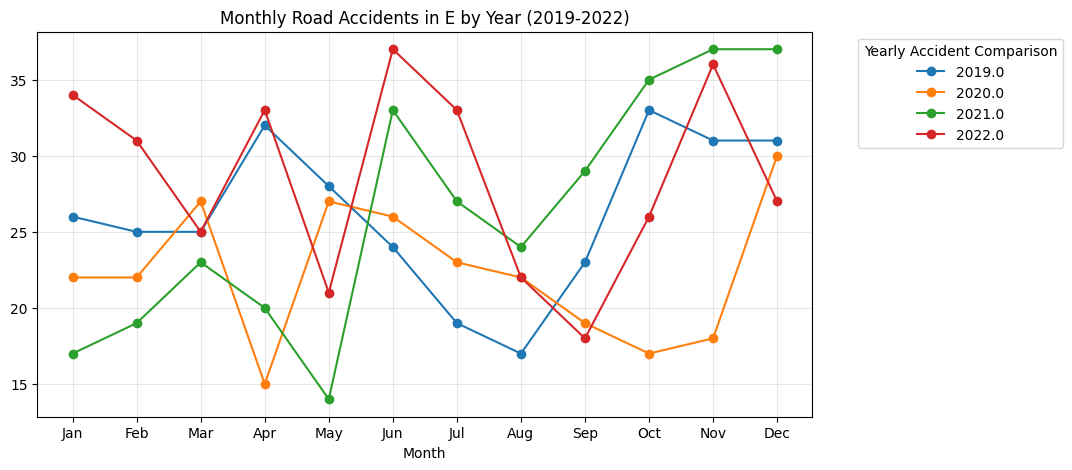

In [37]:
monthly_Enfielddata = Enfield_df.groupby(['Year', 'Month']).size()

monthly_Enfielddata = monthly_Enfielddata.unstack(level=0)

monthly_Enfielddata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in E by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

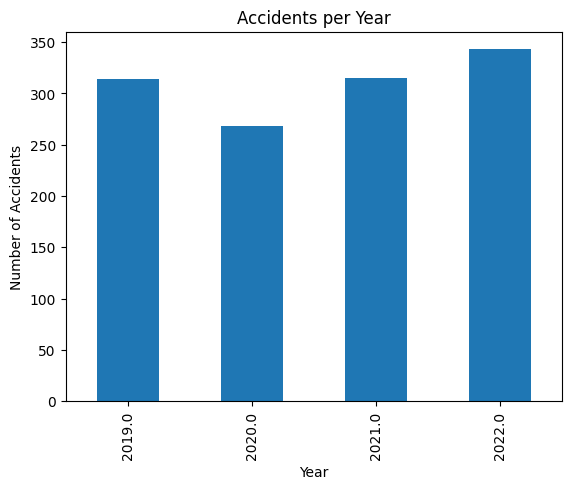

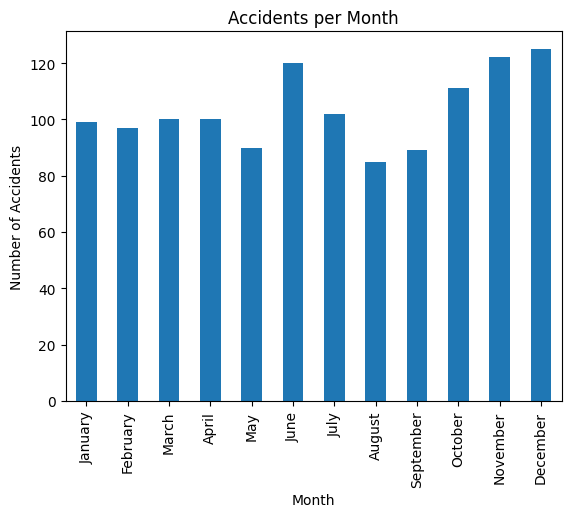

DayOfWeek
Monday       132
Tuesday      194
Wednesday    184
Thursday     194
Friday       175
Saturday     179
Sunday       182
Name: count, dtype: int64


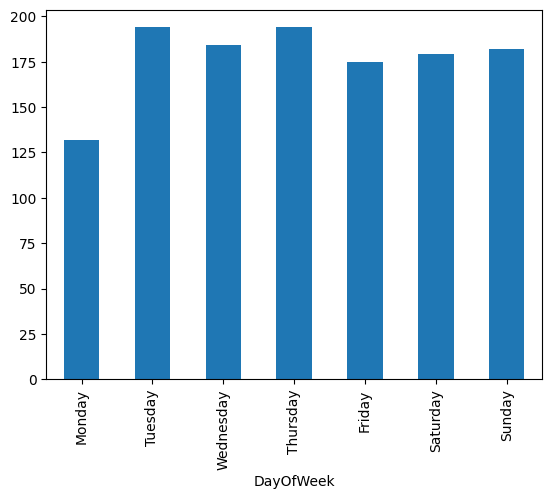

In [38]:
accidents_per_year = Enfield_df['Year'].value_counts().sort_index()
accidents_per_month = Enfield_df['Month'].value_counts().sort_index()
accidents_per_day = Enfield_df['DayOfWeek'].value_counts().sort_index()

accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

<h1> ACCIDENT SEVERITY IN ENFIELD</h1>

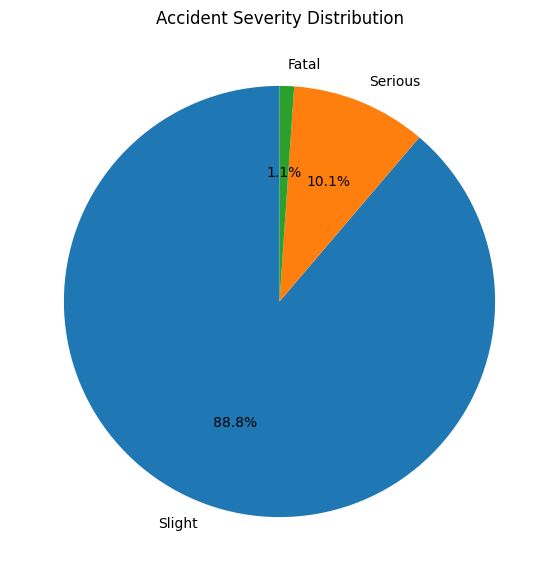

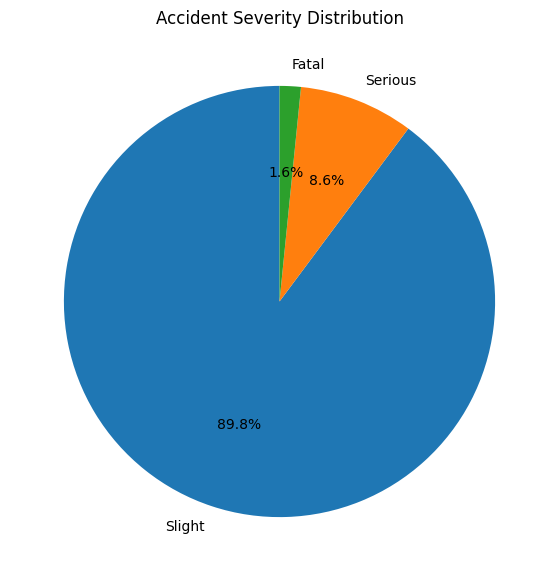

In [39]:
severity_Enfield  = Enfield_df['Accident_Severity'].value_counts()

plt.pie(severity_Enfield,
        labels = severity_Enfield.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2019_Enfield = Enfield_df[Enfield_df['Year'] == 2019]
# severity_2019
lsc_2019 = severity_2019_Enfield['Accident_Severity'].value_counts()

plt.pie(lsc_2019,
        labels = lsc_2019.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

<h1> CAMDEN</h1>

In [40]:
Camden_df = uk_road_accident[uk_road_accident['District Area'] == 'Camden']

In [41]:
Camden_df

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
772,200701CP00089,Slight,NaT,51.518494,Daylight,Camden,-0.105251,1,3,Dry,Single carriageway,Urban,Fine no high winds,Motorcycle 125cc and under,NaN,NaN,NaN,NaN
829,200701CP00146,Slight,NaT,51.518494,Daylight,Camden,-0.105251,1,2,Wet or damp,Single carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,NaN,NaN,NaN,NaN
888,200701CP00206,Slight,2019-08-07,51.518409,Darkness - lights lit,Camden,-0.105543,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019.0,8.0,7.0,2.0
942,200701CP00261,Slight,NaT,51.518409,Darkness - lights lit,Camden,-0.105543,3,2,Dry,Single carriageway,Urban,Fine no high winds,Goods 7.5 tonnes mgw and over,NaN,NaN,NaN,NaN
1058,200701CW10035,Serious,NaT,51.535720,Darkness - lights lit,Camden,-0.164953,1,2,Dry,Single carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533082,201001TB00787,Serious,NaT,51.541995,Darkness - lights lit,Camden,-0.146530,1,1,Dry,Single carriageway,Urban,Fine no high winds,Motorcycle over 500cc,NaN,NaN,NaN,NaN
533091,201001TB00799,Serious,NaT,51.521412,Darkness - lights lit,Camden,-0.113347,2,2,Dry,Single carriageway,Urban,Fine no high winds,Motorcycle over 500cc,NaN,NaN,NaN,NaN
533105,201001TB00820,Slight,NaT,51.529648,Daylight,Camden,-0.133479,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,NaN,NaN,NaN,NaN
533123,201001TB00843,Serious,NaT,51.517166,Darkness - lights lit,Camden,-0.123323,3,1,Dry,Single carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,NaN,NaN,NaN,NaN


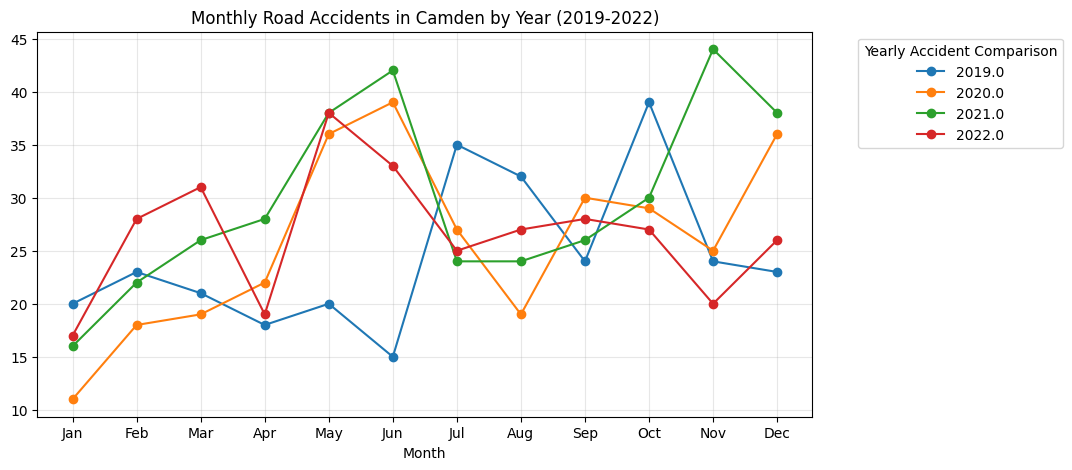

In [42]:
monthly_Camdendata = Camden_df.groupby(['Year', 'Month']).size()

monthly_Camdendata = monthly_Camdendata.unstack(level=0)

monthly_Camdendata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Camden by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

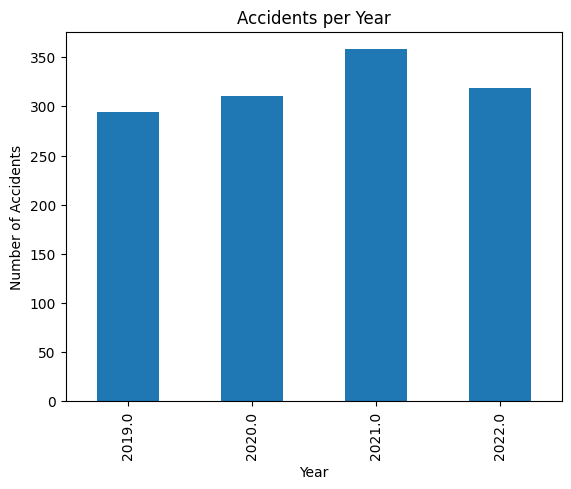

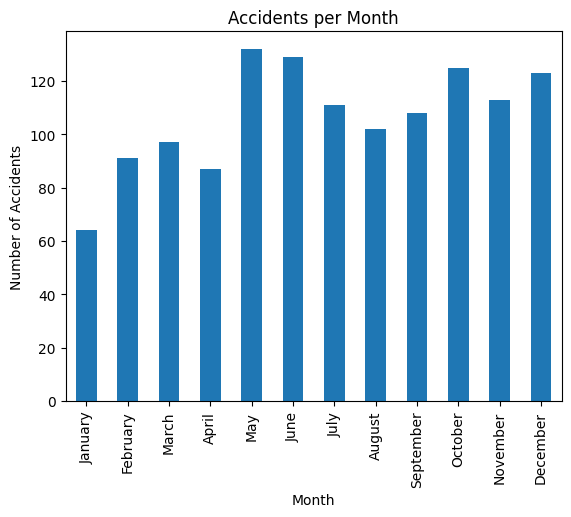

DayOfWeek
Monday       113
Tuesday      159
Wednesday    210
Thursday     224
Friday       222
Saturday     210
Sunday       144
Name: count, dtype: int64


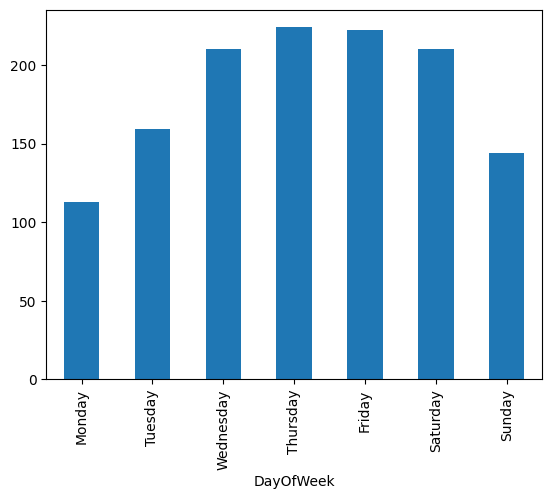

In [43]:
accidents_per_year = Camden_df['Year'].value_counts().sort_index()
accidents_per_month = Camden_df['Month'].value_counts().sort_index()
accidents_per_day = Camden_df['DayOfWeek'].value_counts().sort_index()

accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

<h1> ACCIDENT SEVERITY IN CAMDEN

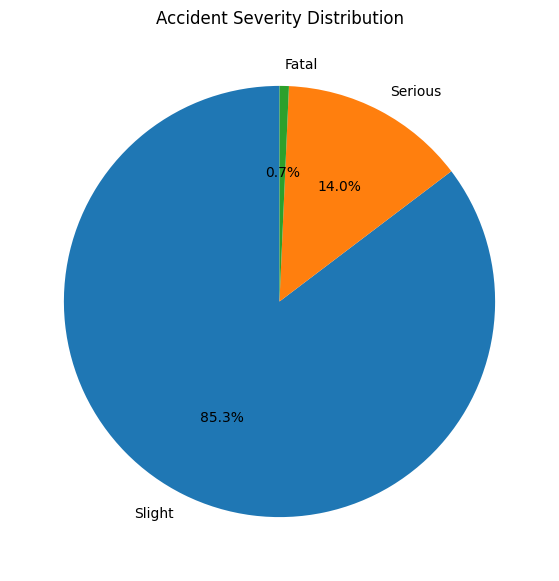

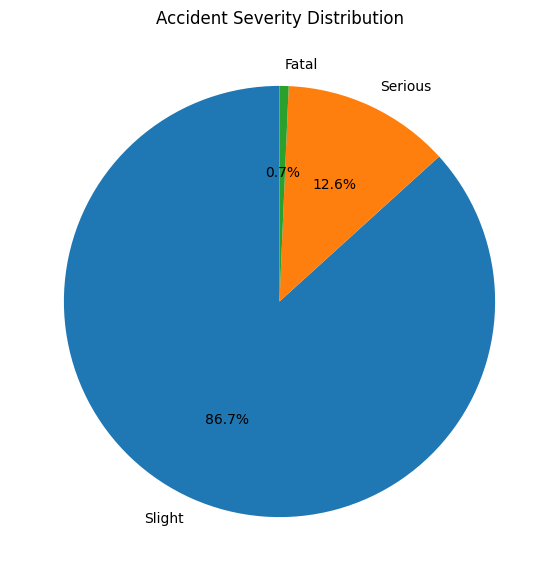

In [44]:
severity_Camden  = Camden_df['Accident_Severity'].value_counts()

plt.pie(severity_Camden,
        labels = severity_Camden.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2019_Camden = Camden_df[Camden_df['Year'] == 2019]
# severity_2019
lsc_2019 = severity_2019_Camden['Accident_Severity'].value_counts()

plt.pie(lsc_2019,
        labels = lsc_2019.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

<h1> LINCOLN</h1>

In [45]:
Lincoln_df = uk_road_accident[uk_road_accident['District Area'] == 'Lincoln']

In [46]:
Lincoln_df

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
94875,200732D000157,Slight,2019-01-05,53.230596,Daylight,Lincoln,-0.541108,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019.0,1.0,5.0,5.0
94876,200732D000207,Slight,2019-01-03,53.227282,Daylight,Lincoln,-0.542120,1,2,Wet or damp,Dual carriageway,Urban,Fine no high winds,Car,2019.0,1.0,3.0,3.0
94878,200732D002007,Serious,2019-01-05,53.226944,Daylight,Lincoln,-0.536588,1,2,Dry,Dual carriageway,Urban,NaN,Car,2019.0,1.0,5.0,5.0
94880,200732D002907,Slight,2019-01-02,53.213507,Darkness - lights lit,Lincoln,-0.577631,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019.0,1.0,2.0,2.0
94882,200732D004907,Fatal,2019-01-09,53.205139,Darkness - lights lit,Lincoln,-0.577010,1,2,Wet or damp,Single carriageway,Urban,Fine no high winds,Car,2019.0,1.0,9.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599546,201032D402810,Slight,NaT,53.235192,Daylight,Lincoln,-0.527467,1,1,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,NaN,NaN,NaN,NaN
599551,201032D405710,Slight,NaT,53.217080,Daylight,Lincoln,-0.538572,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,NaN,NaN,NaN,NaN
599557,201032D407310,Slight,NaT,53.220631,Daylight,Lincoln,-0.557024,1,3,Wet or damp,Dual carriageway,Urban,Fine no high winds,Car,NaN,NaN,NaN,NaN
599559,201032D408410,Slight,2022-10-07,53.228982,Daylight,Lincoln,-0.534122,1,2,NaN,Single carriageway,Urban,NaN,Car,2022.0,10.0,7.0,4.0


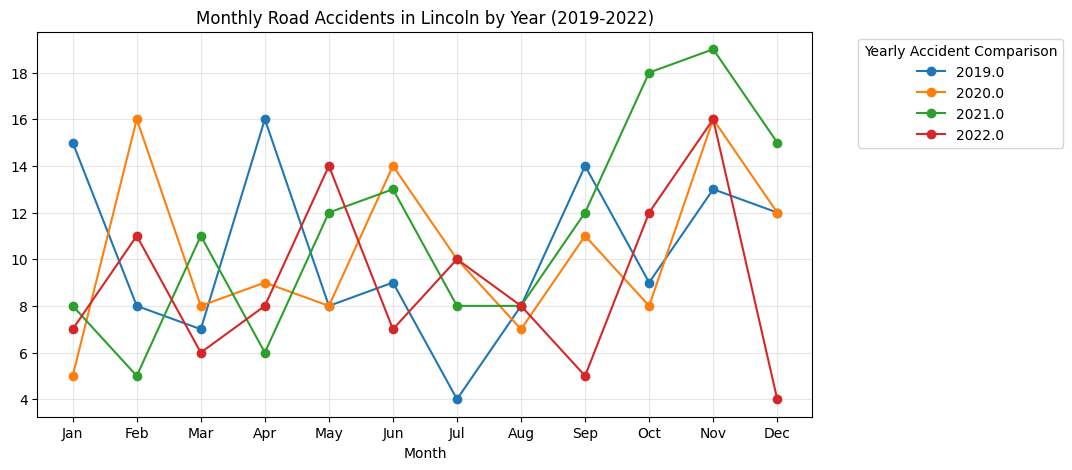

In [47]:
monthly_Lincolndata = Lincoln_df.groupby(['Year', 'Month']).size()

monthly_Lincolndata = monthly_Lincolndata.unstack(level=0)

monthly_Lincolndata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Lincoln by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

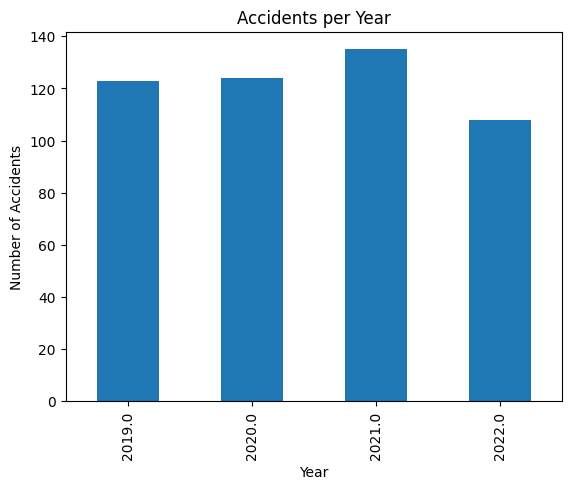

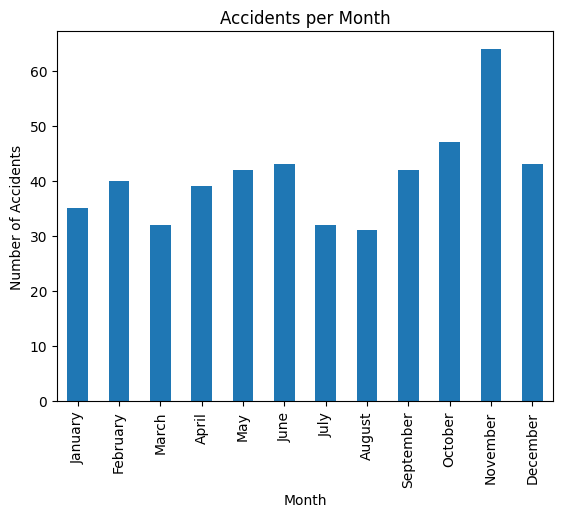

DayOfWeek
Monday       54
Tuesday      74
Wednesday    83
Thursday     66
Friday       71
Saturday     78
Sunday       64
Name: count, dtype: int64


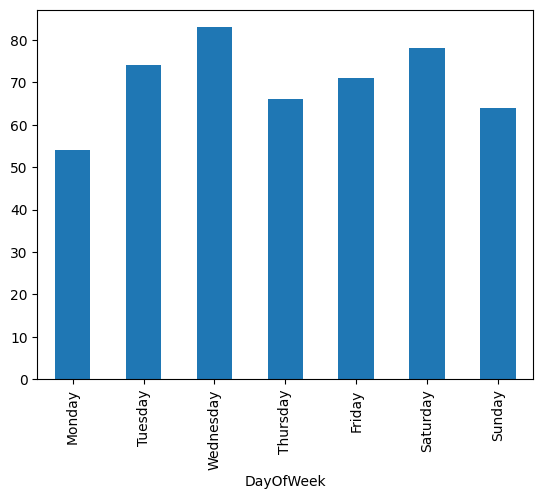

In [48]:
accidents_per_year = Lincoln_df['Year'].value_counts().sort_index()
accidents_per_month = Lincoln_df['Month'].value_counts().sort_index()
accidents_per_day = Lincoln_df['DayOfWeek'].value_counts().sort_index()

accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

<h1> ACCIDENT SEVERITY IN LINCOLN

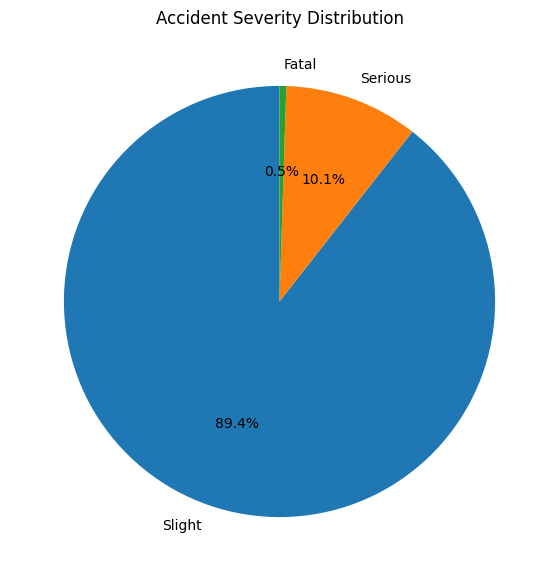

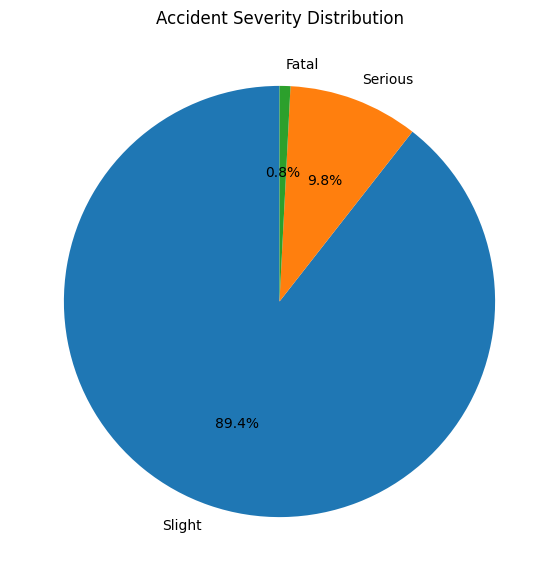

In [49]:
severity_Lincoln  = Lincoln_df['Accident_Severity'].value_counts()

plt.pie(severity_Lincoln,
        labels = severity_Lincoln.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2019_Lincoln = Lincoln_df[Lincoln_df['Year'] == 2019]
# severity_2019
lsc_2019 = severity_2019_Lincoln['Accident_Severity'].value_counts()

plt.pie(lsc_2019,
        labels = lsc_2019.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

<h1> PENDLE</h1>

In [50]:
Pendle_df = uk_road_accident[uk_road_accident['District Area'] == 'Pendle']

In [51]:
Pendle_df

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
29424,200704FE07001,Slight,2019-01-03,53.921930,Darkness - no lighting,Pendle,-2.145536,2,1,Wet or damp,Single carriageway,Rural,Raining no high winds,Van / Goods 3.5 tonnes mgw or under,2019.0,1.0,3.0,3.0
29425,200704FE07002,Slight,2019-01-04,53.851494,Darkness - lights lit,Pendle,-2.188768,1,3,Wet or damp,Single carriageway,Urban,Fine no high winds,Car,2019.0,1.0,4.0,4.0
29426,200704FE07003,Slight,2019-01-04,53.858161,Daylight,Pendle,-2.178308,1,1,Wet or damp,Single carriageway,Urban,Raining + high winds,Car,2019.0,1.0,4.0,4.0
29427,200704FE07004,Slight,2019-01-05,53.854021,Daylight,Pendle,-2.181939,1,2,Wet or damp,Single carriageway,Rural,Raining no high winds,Car,2019.0,1.0,5.0,5.0
29428,200704FE07005,Slight,2019-01-08,53.847891,Darkness - lights lit,Pendle,-2.193464,1,2,Wet or damp,Single carriageway,Urban,Raining + high winds,Car,2019.0,1.0,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545994,201004TA10106,Serious,NaT,53.854182,Daylight,Pendle,-2.193797,1,1,Dry,Dual carriageway,Rural,Fine no high winds,Car,NaN,NaN,NaN,NaN
545996,201004TA10108,Serious,NaT,53.835881,Darkness - lights lit,Pendle,-2.225624,1,1,Dry,Dual carriageway,Rural,Fine no high winds,Car,NaN,NaN,NaN,NaN
546011,201004TA10123,Serious,NaT,53.834530,Daylight,Pendle,-2.226832,1,2,Dry,Dual carriageway,Rural,Fine no high winds,Car,NaN,NaN,NaN,NaN
546028,201004TA10140,Slight,2022-08-12,53.813713,Daylight,Pendle,-2.253906,3,2,Dry,Dual carriageway,Rural,Fine no high winds,Car,2022.0,8.0,12.0,4.0


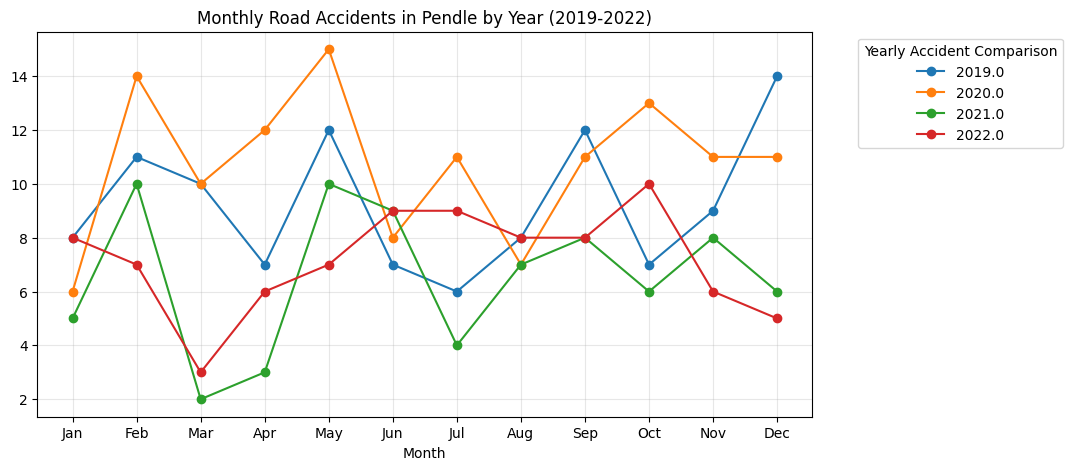

In [52]:
monthly_Pendledata = Pendle_df.groupby(['Year', 'Month']).size()

monthly_Pendledata = monthly_Pendledata.unstack(level=0)

monthly_Pendledata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Pendle by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

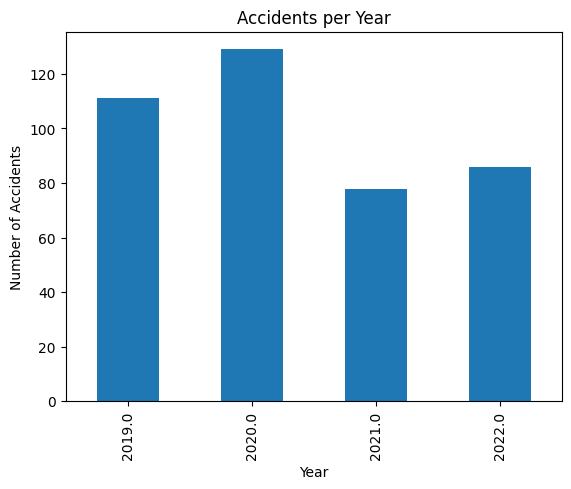

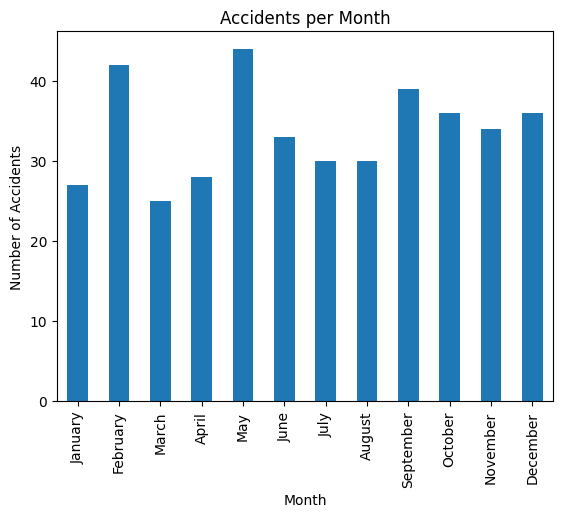

DayOfWeek
Monday       41
Tuesday      62
Wednesday    67
Thursday     52
Friday       60
Saturday     59
Sunday       63
Name: count, dtype: int64


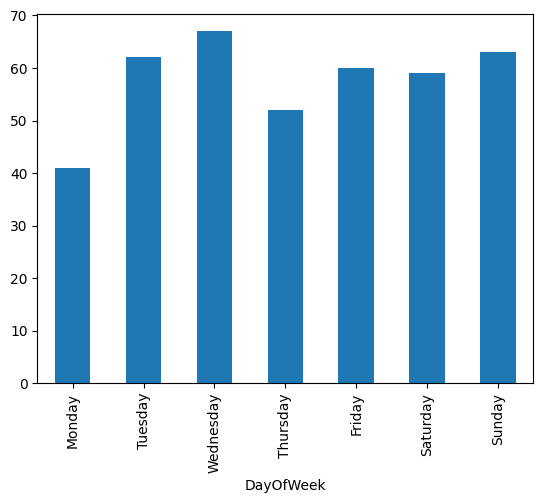

In [53]:
accidents_per_year = Pendle_df['Year'].value_counts().sort_index()
accidents_per_month = Pendle_df['Month'].value_counts().sort_index()
accidents_per_day = Pendle_df['DayOfWeek'].value_counts().sort_index()

accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

<h1> ACCIDENT SEVERITY IN PENDLE</h1>

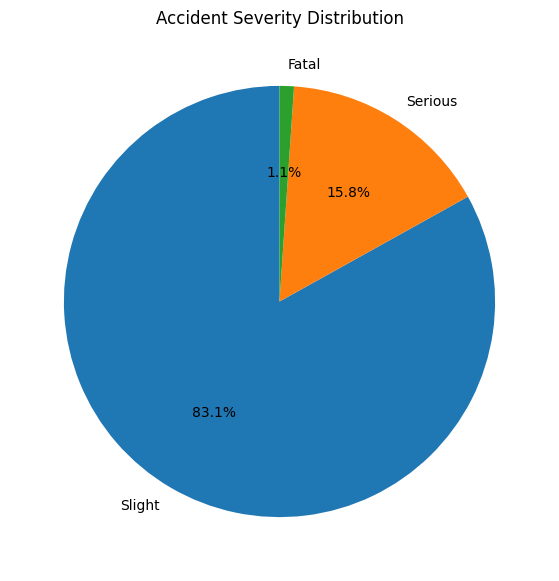

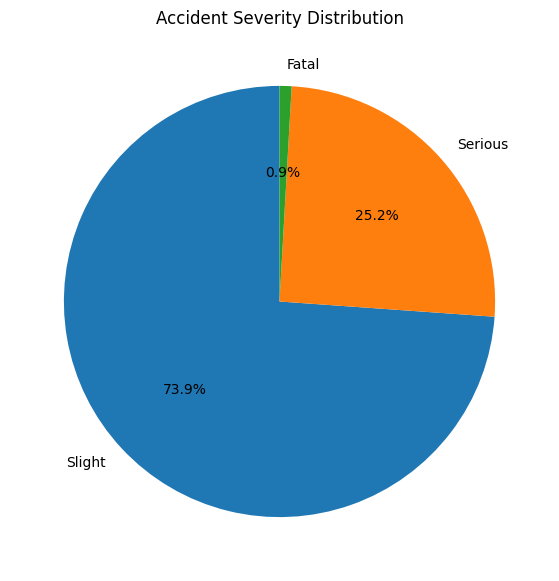

In [54]:
severity_Pendle  = Pendle_df['Accident_Severity'].value_counts()

plt.pie(severity_Pendle,
        labels = severity_Pendle.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2019_Pendle = Pendle_df[Pendle_df['Year'] == 2019]
# severity_2019
lsc_2019 = severity_2019_Pendle['Accident_Severity'].value_counts()

plt.pie(lsc_2019,
        labels = lsc_2019.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

<h1> SELBY</h1>

In [55]:
Selby_df = uk_road_accident[uk_road_accident['District Area'] == 'Selby']

In [56]:
Selby_df

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
51015,2.01E+12,Slight,2019-01-02,53.780131,Daylight,Selby,-1.075909,1,2,Dry,Roundabout,Urban,Fine no high winds,Car,2019.0,1.0,2.0,2.0
51021,2.01E+12,Slight,2019-01-02,53.860255,Darkness - no lighting,Selby,-1.324116,1,1,Dry,Dual carriageway,Rural,Fine no high winds,Car,2019.0,1.0,2.0,2.0
51028,2.01E+12,Slight,2019-01-03,53.678279,Daylight,Selby,-1.147025,1,2,Wet or damp,Single carriageway,Rural,Other,Van / Goods 3.5 tonnes mgw or under,2019.0,1.0,3.0,3.0
51057,2.01E+12,Slight,2019-01-10,53.872366,Daylight,Selby,-1.274034,1,2,Dry,Dual carriageway,Rural,Fine no high winds,Car,2019.0,1.0,10.0,3.0
51060,2.01E+12,Serious,2019-01-11,53.802139,Darkness - no lighting,Selby,-1.240324,1,1,Wet or damp,Single carriageway,Rural,Raining + high winds,Goods 7.5 tonnes mgw and over,2019.0,1.0,11.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564831,2.01E+12,Slight,NaT,53.694426,Darkness - lights lit,Selby,-1.155180,1,1,Frost or ice,Roundabout,Rural,Fine no high winds,Car,NaN,NaN,NaN,NaN
564836,2.01E+12,Slight,NaT,53.797970,Darkness - no lighting,Selby,-1.193789,1,1,Frost or ice,Single carriageway,Rural,Other,Car,NaN,NaN,NaN,NaN
564837,2.01E+12,Serious,NaT,53.827481,Darkness - no lighting,Selby,-1.050406,2,2,Frost or ice,Single carriageway,Rural,Other,Van / Goods 3.5 tonnes mgw or under,NaN,NaN,NaN,NaN
564854,2.01E+12,Slight,NaT,53.790059,Daylight,Selby,-1.081156,1,2,Snow,Single carriageway,Urban,Other,Car,NaN,NaN,NaN,NaN


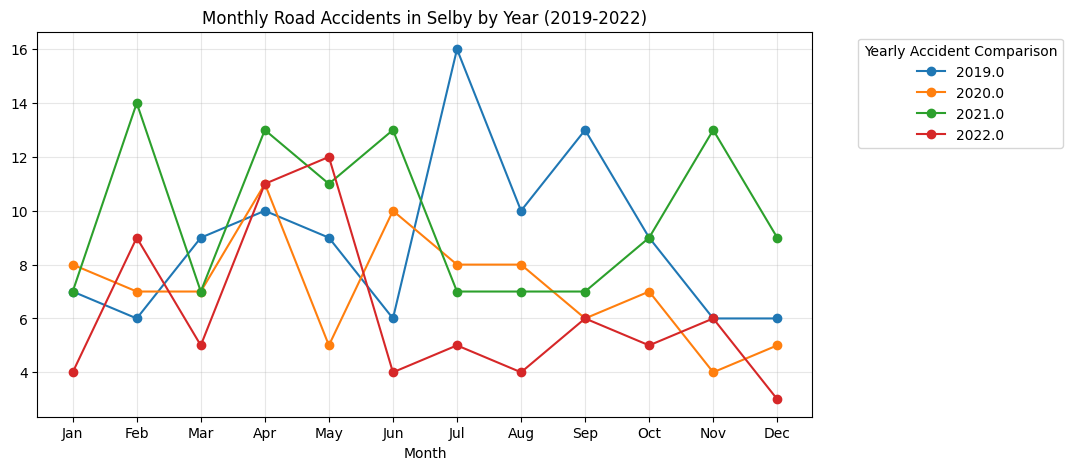

In [57]:
monthly_Selbydata = Selby_df.groupby(['Year', 'Month']).size()

monthly_Selbydata = monthly_Selbydata.unstack(level=0)

monthly_Selbydata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Selby by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

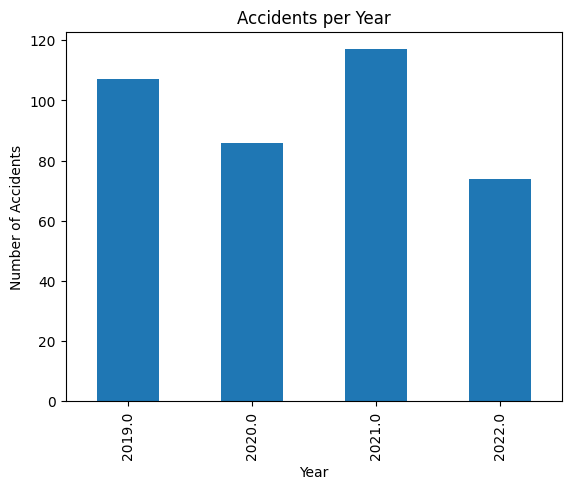

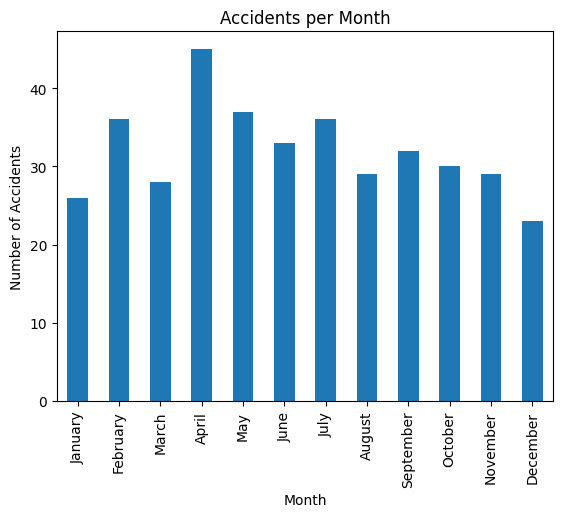

DayOfWeek
Monday       63
Tuesday      47
Wednesday    54
Thursday     48
Friday       65
Saturday     59
Sunday       48
Name: count, dtype: int64


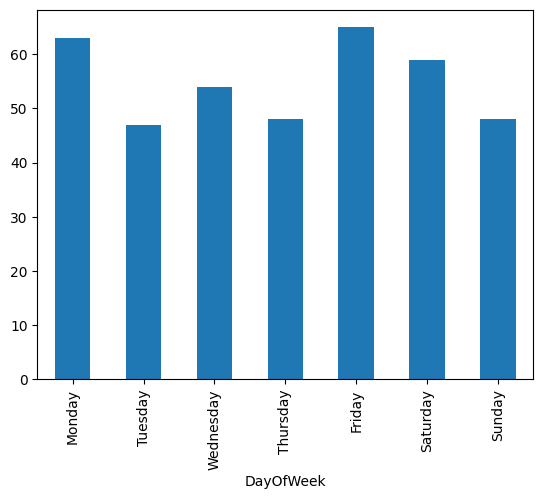

In [58]:
accidents_per_year = Selby_df['Year'].value_counts().sort_index()
accidents_per_month = Selby_df['Month'].value_counts().sort_index()
accidents_per_day = Selby_df['DayOfWeek'].value_counts().sort_index()

accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

<h1> ACCIDENT SEVERITY IN SELBY</h1>

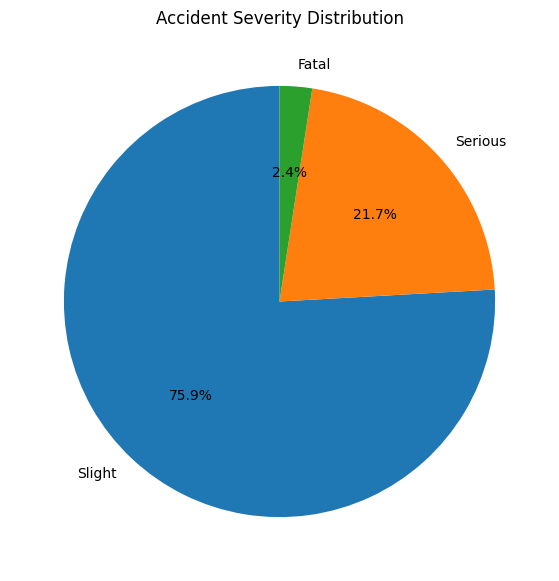

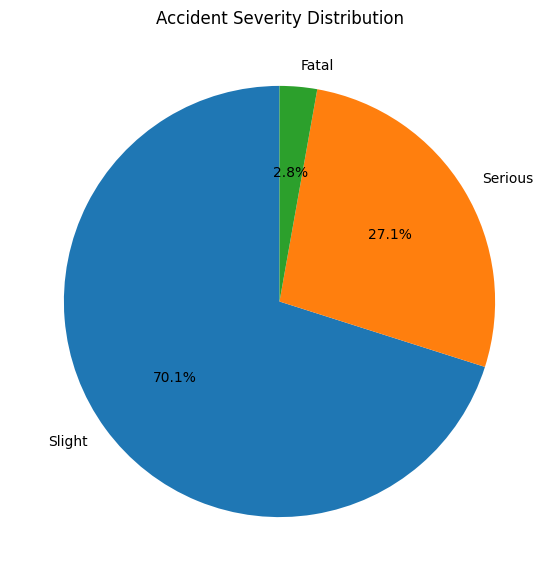

In [59]:
severity_Selby = Selby_df['Accident_Severity'].value_counts()

plt.pie(severity_Selby,
        labels = severity_Selby .index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2019_Selby  = Selby_df[Selby_df['Year'] == 2019]
# severity_2019
lsc_2019 = severity_2019_Selby['Accident_Severity'].value_counts()

plt.pie(lsc_2019,
        labels = lsc_2019.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

<h1> LEEDS</h1>

In [60]:
Leeds_df = uk_road_accident[uk_road_accident['District Area'] == 'Leeds']

In [61]:
Leeds_df

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
53613,2.01E+12,Slight,2019-01-01,53.815801,Darkness - lights lit,Leeds,-1.518184,1,1,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019.0,1.0,1.0,1.0
53617,2.01E+12,Slight,2019-01-01,53.792364,Darkness - lights lit,Leeds,-1.547144,2,2,Wet or damp,Single carriageway,Urban,Raining + high winds,Car,2019.0,1.0,1.0,1.0
53619,2.01E+12,Slight,2019-01-02,53.794190,Darkness - no lighting,Leeds,-1.323964,1,2,Wet or damp,Dual carriageway,Rural,Fine no high winds,Car,2019.0,1.0,2.0,2.0
53622,2.01E+12,Slight,2019-01-01,53.800989,Daylight,Leeds,-1.522909,1,1,Wet or damp,Single carriageway,Urban,Fine no high winds,Goods 7.5 tonnes mgw and over,2019.0,1.0,1.0,1.0
53623,2.01E+12,Slight,2019-01-01,53.815991,Darkness - lights lit,Leeds,-1.651083,1,4,Wet or damp,Single carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2019.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570620,2.01E+12,Slight,NaT,53.929367,Daylight,Leeds,-1.389860,1,2,Wet or damp,Single carriageway,Urban,Fine no high winds,Car,NaN,NaN,NaN,NaN
570624,2.01E+12,Serious,NaT,53.833427,Darkness - lighting unknown,Leeds,-1.543510,1,2,Wet or damp,Dual carriageway,Urban,Fine no high winds,Car,NaN,NaN,NaN,NaN
570626,2.01E+12,Slight,NaT,53.803974,Daylight,Leeds,-1.694003,1,2,Wet or damp,Dual carriageway,Urban,Fine no high winds,Motorcycle over 500cc,NaN,NaN,NaN,NaN
570629,2.01E+12,Slight,NaT,53.796922,Darkness - lighting unknown,Leeds,-1.540263,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,NaN,NaN,NaN,NaN


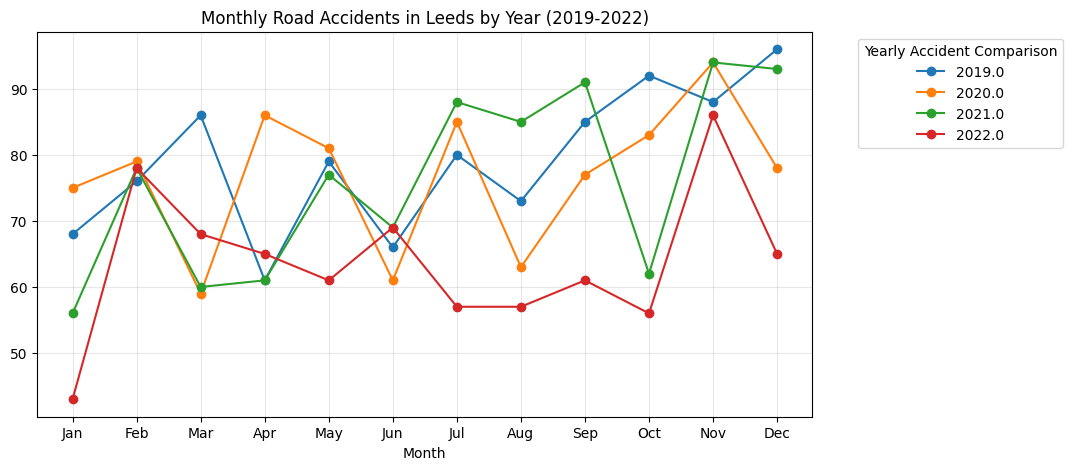

In [62]:
monthly_Leedsdata = Leeds_df.groupby(['Year', 'Month']).size()

monthly_Leedsdata = monthly_Leedsdata.unstack(level=0)

monthly_Leedsdata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Leeds by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

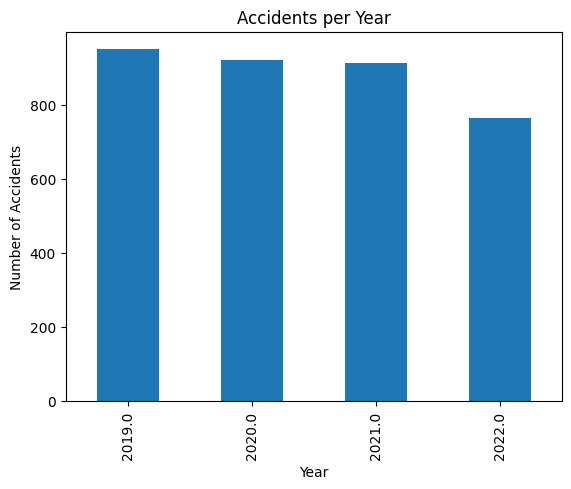

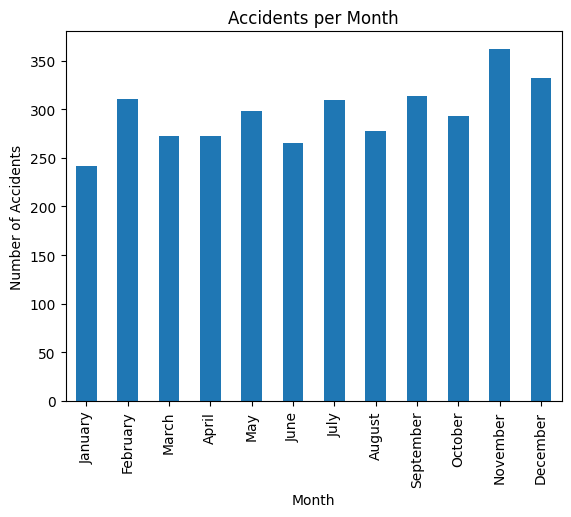

DayOfWeek
Monday       375
Tuesday      530
Wednesday    526
Thursday     582
Friday       534
Saturday     554
Sunday       450
Name: count, dtype: int64


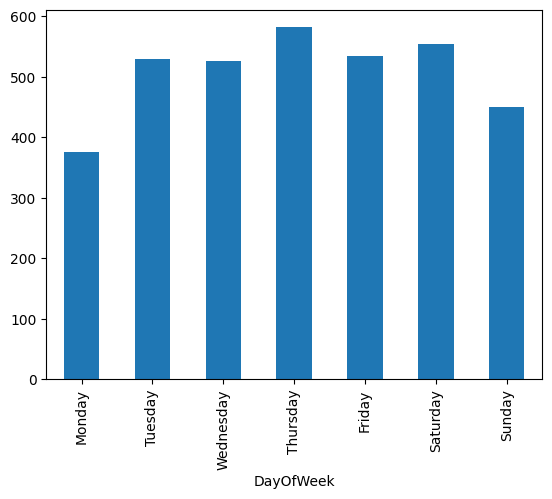

In [63]:
accidents_per_year = Leeds_df['Year'].value_counts().sort_index()
accidents_per_month = Leeds_df['Month'].value_counts().sort_index()
accidents_per_day = Leeds_df['DayOfWeek'].value_counts().sort_index()

accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

<h1> ACCIDENT SEVERITY IN LEEDS</h1>

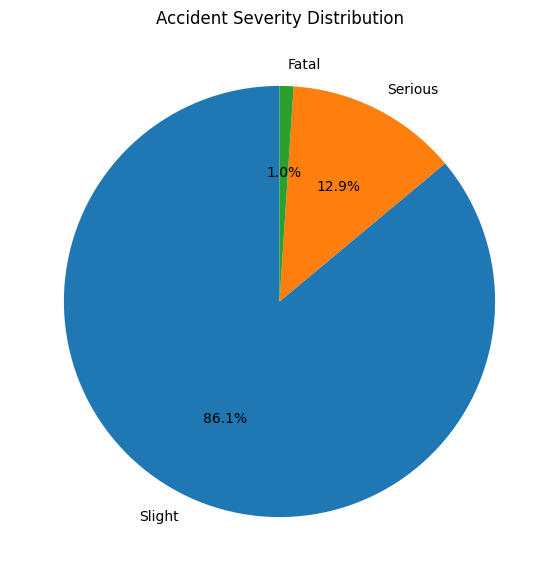

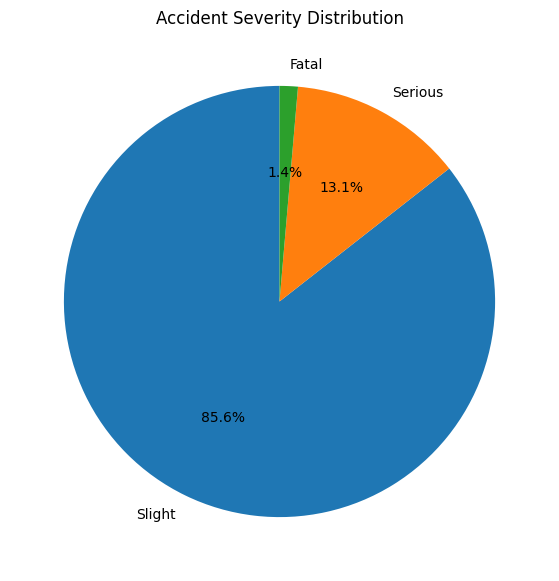

In [64]:
severity_Leeds  = Leeds_df['Accident_Severity'].value_counts()

plt.pie(severity_Leeds,
        labels = severity_Leeds.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2019_Leeds = Leeds_df[Leeds_df['Year'] == 2019]
# severity_2019
lsc_2019 = severity_2019_Leeds['Accident_Severity'].value_counts()

plt.pie(lsc_2019,
        labels = lsc_2019.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()